# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = boston.data
y = boston.target

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [8]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


- epoch 수와 batchz_size 변경하며 test

In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
12/12 [==============================] - 0s 10ms/step - loss: 584.1934 - val_loss: 513.2452
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 553.7292 - val_loss: 476.3253
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 505.0817 - val_loss: 416.5579
Epoch 4/1000
12/12 [==============================] - 0s 8ms/step - loss: 430.9668 - val_loss: 333.3369
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 334.0344 - val_loss: 235.7888
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 234.1035 - val_loss: 148.9701
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 157.6609 - val_loss: 105.4496
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 126.3411 - val_loss: 96.0231
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 116.6383 - val_loss: 88.0176
Epoch 10/1000
12/12 [==============================] - 0s 3ms/ste

12/12 [==============================] - 0s 2ms/step - loss: 19.1776 - val_loss: 13.3209
Epoch 81/1000
12/12 [==============================] - 0s 3ms/step - loss: 18.8303 - val_loss: 13.0507
Epoch 82/1000
12/12 [==============================] - 0s 2ms/step - loss: 18.1706 - val_loss: 13.0648
Epoch 83/1000
12/12 [==============================] - 0s 3ms/step - loss: 17.9559 - val_loss: 13.0080
Epoch 84/1000
12/12 [==============================] - 0s 2ms/step - loss: 17.9147 - val_loss: 13.1597
Epoch 85/1000
12/12 [==============================] - 0s 2ms/step - loss: 17.8234 - val_loss: 12.7294
Epoch 86/1000
12/12 [==============================] - 0s 3ms/step - loss: 17.8167 - val_loss: 12.7367
Epoch 87/1000
12/12 [==============================] - 0s 3ms/step - loss: 17.6583 - val_loss: 12.6620
Epoch 88/1000
12/12 [==============================] - 0s 3ms/step - loss: 17.4086 - val_loss: 12.4689
Epoch 89/1000
12/12 [==============================] - 0s 3ms/step - loss: 17.3561 - va

12/12 [==============================] - 0s 2ms/step - loss: 12.2814 - val_loss: 9.8251
Epoch 160/1000
12/12 [==============================] - 0s 2ms/step - loss: 12.1693 - val_loss: 9.9408
Epoch 161/1000
12/12 [==============================] - 0s 2ms/step - loss: 11.9869 - val_loss: 9.6291
Epoch 162/1000
12/12 [==============================] - 0s 2ms/step - loss: 12.1886 - val_loss: 10.0416
Epoch 163/1000
12/12 [==============================] - 0s 3ms/step - loss: 11.9160 - val_loss: 9.5807
Epoch 164/1000
12/12 [==============================] - 0s 2ms/step - loss: 11.8782 - val_loss: 9.6793
Epoch 165/1000
12/12 [==============================] - 0s 2ms/step - loss: 11.8092 - val_loss: 9.8584
Epoch 166/1000
12/12 [==============================] - 0s 3ms/step - loss: 11.8959 - val_loss: 9.5379
Epoch 167/1000
12/12 [==============================] - 0s 2ms/step - loss: 11.7513 - val_loss: 9.7245
Epoch 168/1000
12/12 [==============================] - 0s 2ms/step - loss: 11.5979 - v

12/12 [==============================] - 0s 3ms/step - loss: 10.3036 - val_loss: 9.1097
Epoch 239/1000
12/12 [==============================] - 0s 3ms/step - loss: 10.2836 - val_loss: 9.2294
Epoch 240/1000
12/12 [==============================] - 0s 3ms/step - loss: 10.2801 - val_loss: 9.9952
Epoch 241/1000
12/12 [==============================] - 0s 3ms/step - loss: 9.8566 - val_loss: 9.2485
Epoch 242/1000
12/12 [==============================] - 0s 3ms/step - loss: 10.1817 - val_loss: 11.0830
Epoch 243/1000
12/12 [==============================] - 0s 3ms/step - loss: 10.1304 - val_loss: 9.1085
Epoch 244/1000
12/12 [==============================] - 0s 3ms/step - loss: 9.5527 - val_loss: 9.3151
Epoch 245/1000
12/12 [==============================] - 0s 3ms/step - loss: 9.5233 - val_loss: 9.0615
Epoch 246/1000
12/12 [==============================] - 0s 3ms/step - loss: 9.5099 - val_loss: 9.1075
Epoch 247/1000
12/12 [==============================] - 0s 3ms/step - loss: 9.6270 - val_lo

12/12 [==============================] - 0s 3ms/step - loss: 8.3652 - val_loss: 8.6278
Epoch 319/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.2959 - val_loss: 8.9105
Epoch 320/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.2636 - val_loss: 9.5292
Epoch 321/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.3659 - val_loss: 8.9059
Epoch 322/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.2248 - val_loss: 8.9456
Epoch 323/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.3071 - val_loss: 9.5471
Epoch 324/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.2403 - val_loss: 8.7326
Epoch 325/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.1860 - val_loss: 9.0734
Epoch 326/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.1557 - val_loss: 8.7475
Epoch 327/1000
12/12 [==============================] - 0s 3ms/step - loss: 8.1642 - val_loss: 9.

12/12 [==============================] - 0s 3ms/step - loss: 7.2698 - val_loss: 8.9373
Epoch 399/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.2688 - val_loss: 8.8402
Epoch 400/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.1248 - val_loss: 9.3922
Epoch 401/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.1751 - val_loss: 8.8110
Epoch 402/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.2426 - val_loss: 9.0983
Epoch 403/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.0817 - val_loss: 8.6932
Epoch 404/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.0883 - val_loss: 8.9164
Epoch 405/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.2379 - val_loss: 8.6503
Epoch 406/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.0977 - val_loss: 8.8106
Epoch 407/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.0933 - val_loss: 8.

12/12 [==============================] - 0s 2ms/step - loss: 6.3828 - val_loss: 8.9090
Epoch 479/1000
12/12 [==============================] - 0s 2ms/step - loss: 6.4230 - val_loss: 8.9201
Epoch 480/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.3979 - val_loss: 8.7103
Epoch 481/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.4082 - val_loss: 8.3374
Epoch 482/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.4763 - val_loss: 8.4044
Epoch 483/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.6138 - val_loss: 8.7554
Epoch 484/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.6393 - val_loss: 8.9070
Epoch 485/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.2990 - val_loss: 8.5263
Epoch 486/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.3442 - val_loss: 8.4226
Epoch 487/1000
12/12 [==============================] - 0s 3ms/step - loss: 6.3660 - val_loss: 8.

12/12 [==============================] - 0s 3ms/step - loss: 6.2358 - val_loss: 8.1226
Epoch 559/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.9480 - val_loss: 8.1632
Epoch 560/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.8727 - val_loss: 8.2610
Epoch 561/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.9619 - val_loss: 8.3076
Epoch 562/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.9785 - val_loss: 9.1746
Epoch 563/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.8034 - val_loss: 8.2730
Epoch 564/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.8868 - val_loss: 8.3493
Epoch 565/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.8888 - val_loss: 8.2835
Epoch 566/1000
12/12 [==============================] - 0s 2ms/step - loss: 5.7697 - val_loss: 8.6228
Epoch 567/1000
12/12 [==============================] - 0s 2ms/step - loss: 5.6967 - val_loss: 8.

12/12 [==============================] - 0s 3ms/step - loss: 5.4992 - val_loss: 8.3099
Epoch 639/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.2041 - val_loss: 8.4240
Epoch 640/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.3196 - val_loss: 8.3877
Epoch 641/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.2501 - val_loss: 8.1242
Epoch 642/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.2590 - val_loss: 8.4488
Epoch 643/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.2605 - val_loss: 8.2951
Epoch 644/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.1911 - val_loss: 8.4924
Epoch 645/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.2962 - val_loss: 8.9359
Epoch 646/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.3019 - val_loss: 8.3091
Epoch 647/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.1972 - val_loss: 8.

12/12 [==============================] - 0s 3ms/step - loss: 4.8766 - val_loss: 9.5229
Epoch 719/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.9255 - val_loss: 7.9586
Epoch 720/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.8152 - val_loss: 8.2047
Epoch 721/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.7845 - val_loss: 8.1111
Epoch 722/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.8007 - val_loss: 8.2004
Epoch 723/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.9153 - val_loss: 9.3242
Epoch 724/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.2483 - val_loss: 8.0798
Epoch 725/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.1184 - val_loss: 7.9093
Epoch 726/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.0171 - val_loss: 8.0169
Epoch 727/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.7749 - val_loss: 8.

12/12 [==============================] - 0s 3ms/step - loss: 4.5246 - val_loss: 7.8410
Epoch 799/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.5499 - val_loss: 8.0289
Epoch 800/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.4575 - val_loss: 7.8859
Epoch 801/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.4833 - val_loss: 8.6886
Epoch 802/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.4596 - val_loss: 7.9579
Epoch 803/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.4518 - val_loss: 8.3800
Epoch 804/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.4400 - val_loss: 8.3540
Epoch 805/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.4609 - val_loss: 7.9550
Epoch 806/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.5002 - val_loss: 7.9941
Epoch 807/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.5832 - val_loss: 7.

12/12 [==============================] - 0s 2ms/step - loss: 4.1676 - val_loss: 8.5783
Epoch 879/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.2939 - val_loss: 8.3805
Epoch 880/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.0945 - val_loss: 7.8792
Epoch 881/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.2567 - val_loss: 7.9287
Epoch 882/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.2432 - val_loss: 8.2070
Epoch 883/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.3464 - val_loss: 7.8685
Epoch 884/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.3074 - val_loss: 8.7467
Epoch 885/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.3472 - val_loss: 8.0943
Epoch 886/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.1536 - val_loss: 8.2196
Epoch 887/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.2705 - val_loss: 7.

12/12 [==============================] - 0s 3ms/step - loss: 3.9449 - val_loss: 8.3121
Epoch 959/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.0944 - val_loss: 8.5121
Epoch 960/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.0583 - val_loss: 8.1801
Epoch 961/1000
12/12 [==============================] - 0s 3ms/step - loss: 3.9499 - val_loss: 8.0668
Epoch 962/1000
12/12 [==============================] - 0s 3ms/step - loss: 3.8855 - val_loss: 7.8572
Epoch 963/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.0472 - val_loss: 8.1345
Epoch 964/1000
12/12 [==============================] - 0s 2ms/step - loss: 3.8772 - val_loss: 8.0282
Epoch 965/1000
12/12 [==============================] - 0s 3ms/step - loss: 3.9906 - val_loss: 7.7795
Epoch 966/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.3085 - val_loss: 7.9035
Epoch 967/1000
12/12 [==============================] - 0s 3ms/step - loss: 3.9866 - val_loss: 8.

In [12]:
model.evaluate(X_test, y_test, verbose=0)

7.9384379386901855

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

7.938438248059922
0.8858543885972391


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

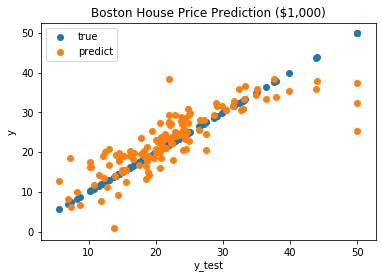

In [26]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')

## sklearn LinearRegression 비교

In [28]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [29]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = regr.predict(X_test)

In [31]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -9.73461848   3.58166758   0.6557961    2.22491269  -9.44984703
  18.60924652   0.30613178 -16.40285193   6.45798039  -5.27226983
 -10.05027162   3.84908108 -19.83885032]
Intercept: 
 27.982576644306654


In [32]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("Variance score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 22.62
Variance score: 0.72


## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [35]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산

### 시각화